<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
from PIL import Image

img = Image.open('meningioma100.png').convert('L')
img = img.resize((256,256))
gray_img = np.array(img)

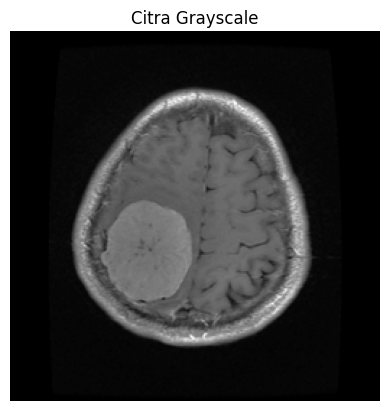

In [39]:
import matplotlib.pyplot as plt

plt.imshow(gray_img, cmap = 'gray')
plt.title('Citra Grayscale')
plt.axis('off')
plt.show()

In [40]:
gray_img.shape

(256, 256)

#Thresholding

In [80]:
#Membuat Histogram
histogram = []
for i in range(0, 256):
  nilai_awal = 0
  histogram.append(nilai_awal)

In [81]:
#Hitung nilai intensitas tiap pixel
for i in range(len(gray_img)):
  for j in range(len(gray_img[i])):
    nilai_pixel = gray_img[i][j]
    histogram[nilai_pixel] = histogram[nilai_pixel] + 1

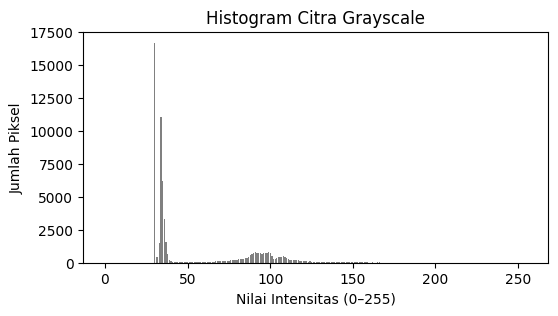

In [97]:
#Visualisasi histogram
plt.figure(figsize=(6, 3))
plt.bar(range(256), histogram, color='gray')
plt.title('Histogram Citra Grayscale')
plt.xlabel('Nilai Intensitas (0–255)')
plt.ylabel('Jumlah Piksel')
plt.show()

In [109]:
def otsu(image):
  #Membuat Histogram
  histogram = []
  for i in range(0, 256):
    nilai_awal = 0
    histogram.append(nilai_awal)

  #Hitung nilai intensitas tiap pixel
  for i in range(len(image)):
    for j in range(len(image[i])):
      nilai_pixel = image[i][j]
      histogram[nilai_pixel] = histogram[nilai_pixel] + 1

  #Hitung total pixel
  total = 0
  for i in range(256):
    total = total + histogram[i]

  best_threshold = 0
  min_within_class_var = float('inf')

  #Otsu dimulai
  for t in range (0, len(histogram)):
    #Background
    jumlah_histogram_b = 0
    for i in range(t):
      jumlah_histogram_b = jumlah_histogram_b + histogram[i]
    weight_b = jumlah_histogram_b / total
    jumlah_intensitas_b = 0
    jumlah_weight_b = 0
    for i in range(t):
      jumlah_intensitas_b = jumlah_intensitas_b + i * histogram[i]
      jumlah_weight_b = jumlah_weight_b + histogram[i]

    #Rata-rata
    if jumlah_weight_b == 0:
      mean_b = 0
    else:
      mean_b = jumlah_intensitas_b / jumlah_weight_b

    #Varians
    var_b = 0
    for i in range(t):
      var_b = var_b + ((i - mean_b) * (i - mean_b)) * histogram[i]
    if jumlah_weight_b != 0:
      var_b = var_b / jumlah_weight_b

    #------------------------------------------------------#

    #Foreground
    jumlah_histogram_f = 0
    for i in range(t, len(histogram)):
      jumlah_histogram_f = jumlah_histogram_f + histogram[i]
    weight_f = jumlah_histogram_f / total
    jumlah_intensitas_f = 0
    jumlah_weight_f = 0
    for i in range(t, len(histogram)):
      jumlah_intensitas_f = jumlah_intensitas_f + i * histogram[i]
      jumlah_weight_f = jumlah_weight_f + histogram[i]

    #Rata-rata
    if jumlah_weight_f == 0:
      mean_f = 0
    else:
      mean_f = jumlah_intensitas_f / jumlah_weight_f

    #Varians
    var_f = 0
    for i in range(t, len(histogram)):
      var_f = var_f + ((i - mean_f) * (i - mean_f)) * histogram[i]
    if jumlah_weight_f != 0:
      var_f = var_f / jumlah_weight_f

    #Within class variance
    within_class_var = (weight_b * var_b) + (weight_f * var_f)

    #Pilih nilai threshold minimum
    if within_class_var < min_within_class_var:
      min_within_class_var = within_class_var
      best_threshold = t
    print(f"t={t} | Wb={weight_b:.6f} | Wf={weight_f:.6f} | μb={mean_b:.6f} | μf={mean_f:.6f} | σ²w={within_class_var:.6f}")

  print("\nNilai threshold terbaik =", best_threshold)

  #Menerapkan otsu ke citra
  otsu_image = (image >= best_threshold) * 255
  return otsu_image, best_threshold

In [110]:
#Terapkan otsu ke citra input def otsu(histogram, [variabel_citranya])
otsu_img, best_threshold = otsu(gray_img)

t=0 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=1 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=2 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=3 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=4 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=5 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=6 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=7 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=8 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=9 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=10 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=11 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μf=55.781540 | σ²w=1095.172902
t=12 | Wb=0.000000 | Wf=1.000000 | μb=0.000000 | μ

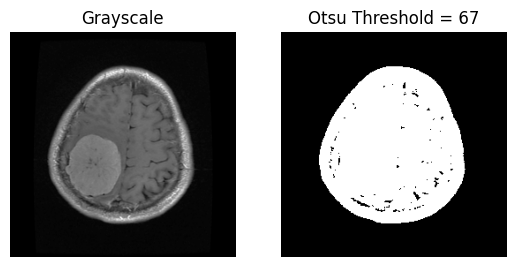

In [111]:
#Visualisasi hasil otsu
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(otsu_img, cmap='gray')
plt.title(f'Otsu Threshold = {best_threshold}')
plt.axis("off")
plt.show()

#Morphological Operation

In [159]:
#Ubah nilainya di citra otsu dengan normalisasi
otsu_biner = (otsu_img / 255).astype(int)

In [160]:
#Dilasi
def dilasi(image, kernel):
  baris_img, kolom_img = image.shape
  baris_kernel, kolom_kernel = kernel.shape

  #Kernel berupa matriks persegi dan harus ganjil
  baris_padding = int((baris_kernel - 1) / 2)
  kolom_padding = int((kolom_kernel - 1) / 2)

  baris_baru = baris_img + 2 * baris_padding
  kolom_baru = kolom_img + 2 * kolom_padding

  #Bentuk matriks zero padding
  padding = []
  for i in range(baris_baru):
    membentuk_padding = []
    for j in range(kolom_baru):
      membentuk_padding.append(0)
    padding.append(membentuk_padding)

  #Proses padding matriks dengan zero padding
  for i in range(baris_img):
    for j in range(kolom_img):
      padding[i+baris_padding][j+kolom_padding] = image[i][j]

  #Proses dilasi
  hasil_dilasi = []
  for i in range(baris_img):
    baris_hasil = []
    for j in range(kolom_img):
      baris_hasil.append(0)
    hasil_dilasi.append(baris_hasil)

  for y in range(baris_img):
    for x in range(kolom_img):
      cek_nilai = 0
      for i in range(baris_kernel):
        for j in range(kolom_kernel):
          if kernel[i][j] == 1 and padding[y+i][x+j] == 1:
            cek_nilai = 1
      hasil_dilasi[y][x] = cek_nilai

  return hasil_dilasi

In [161]:
kernel = np.ones((5,5))
dilasi_img = dilasi(otsu_biner, kernel)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

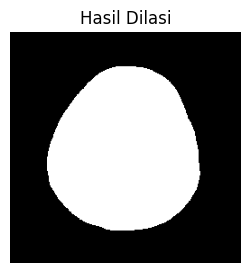

In [166]:
#Visualisasi hasil dilasi
plt.figure(figsize=(3,3))
plt.imshow(dilasi_img, cmap='gray')
plt.title('Hasil Dilasi')
plt.axis("off")

In [167]:
#Erosi
def erosi(image, kernel):
  baris_img, kolom_img = image.shape
  baris_kernel, kolom_kernel = kernel.shape

  #Kernel berupa matriks persegi dan harus ganjil
  baris_padding = int((baris_kernel - 1) / 2)
  kolom_padding = int((kolom_kernel - 1) / 2)

  baris_baru = baris_img + 2 * baris_padding
  kolom_baru = kolom_img + 2 * kolom_padding

  #Bentuk matriks zero padding
  padding = []
  for i in range(baris_baru):
    membentuk_padding = []
    for j in range(kolom_baru):
      membentuk_padding.append(0)
    padding.append(membentuk_padding)

  #Proses padding matriks dengan zero padding
  for i in range(baris_img):
    for j in range(kolom_img):
      padding[i+baris_padding][j+kolom_padding] = image[i][j]

  #Proses erosi
  hasil_erosi = []
  for i in range(baris_img):
    baris_hasil = []
    for j in range(kolom_img):
      baris_hasil.append(0)
    hasil_erosi.append(baris_hasil)

  for y in range(baris_img):
    for x in range(kolom_img):
      cek_nilai = 1
      for i in range(baris_kernel):
        for j in range(kolom_kernel):
          if kernel[i][j] == 1 and padding[y+i][x+j] == 0:
            cek_nilai = 0
      hasil_erosi[y][x] = cek_nilai

  return hasil_erosi

In [168]:
kernel = np.ones((5,5))
erosi_img = erosi(otsu_biner, kernel)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

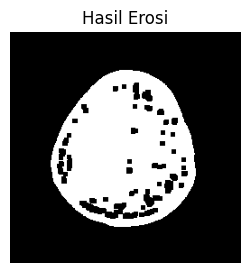

In [169]:
#Visualisasi hasil dilasi
plt.figure(figsize=(3,3))
plt.imshow(erosi_img, cmap='gray')
plt.title('Hasil Erosi')
plt.axis("off")

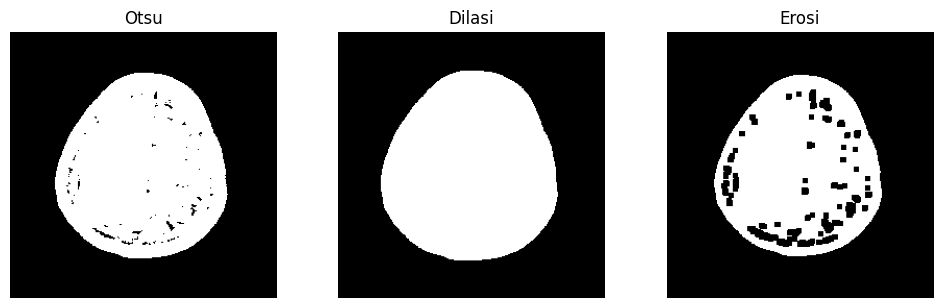

In [172]:
#Visualisasi semuanya
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plt.imshow(otsu_img, cmap='gray')
plt.title('Otsu')
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(dilasi_img, cmap='gray')
plt.title('Dilasi')
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(erosi_img, cmap='gray')
plt.title('Erosi')
plt.axis("off")

# plt.subplot(2,3,4)
# plt.imshow(opening_img, cmap='gray')
# plt.title('Opening')
# plt.axis("off")

# plt.subplot(2,3,5)
# plt.imshow(closing_img, cmap='gray')
# plt.title('Closing')
# plt.axis("off")

plt.tight_layout()
plt.show()

#Perbandingan

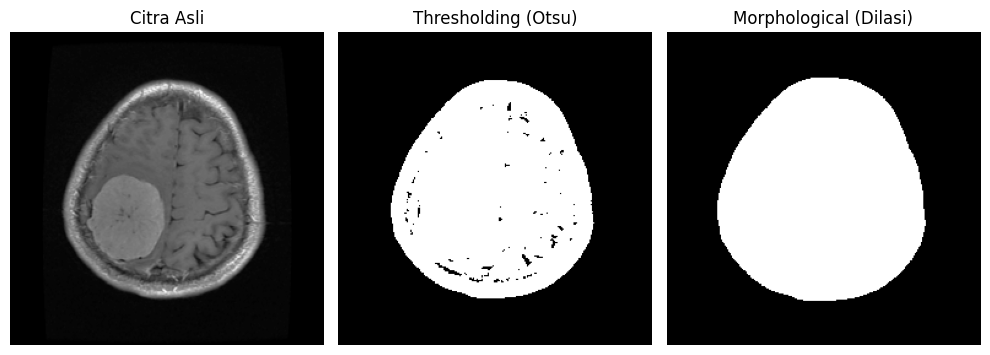

In [170]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Citra Asli')
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(otsu_img, cmap='gray')
plt.title('Thresholding (Otsu)')
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dilasi_img, cmap='gray')
plt.title('Morphological (Dilasi)')
plt.axis("off")

plt.tight_layout()
plt.show()

Dari hasil antara:

1. Segmentasi thresholding menggunakan otsu yang kemudian disebut sebagai A
2. hasil segmentasi thresholding + morphological yang kemudian disebut sebagai B

dapat dilihat bahwa citra A semula masih memiliki bolongan-bolongan kecil di dalam objek hasil segmentasi. Setelah diterapkan operasi morphological, diperoleh citra B yang telah menutup bolongan-bolongan yang ada pada objek hasil segmentasi.

Dari hasil A dan B pula, dapat dinyatakan jika hanya mengandalkan A, maka citra hasil segmentasi bisa saja masih belum baik dikarenakan terdapat bolongan-bolongan pada objek atau bahkan titik-titik di luar objek. Dengan menerapkan B, hasil segmentasi yang diperoleh menjadi lebih detail, jelas, dan merepresentasikan objek dari citra asli dengan lebih baik, sehingga nilai IoU pun dapat meningkat karena area-area yang beririsan pada B lebih banyak dibandingkan A.